In [40]:
# 딥러닝을 구동하는데 필요한 케라스 함수 호출
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리를 불러옵니다
import numpy as np
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분
np.random.seed(3)
tf.random.set_seed(3)

# 준비된 수술 환자 데이터를 불러옵니다
Data_set = np.loadtxt('./data/dataset/ThoraricSurgery.csv',delimiter=',')

# 환자의 기록과 수술 결과를 X와 Y로 구분하여 저장합니다
X = Data_set[: , 0:17]
Y = Data_set[: , 17]

# 딥러닝 구조를 결정합니다(모델을 설정하고 실행하는 부분입니다)
model = Sequential()
model.add(Dense(30, input_dim=17, activation='relu'))  # 노드 개수, 인풋값 개수
model.add(Dense(1, activation='sigmoid'))

# 딥러닝을 실행합니다
model.compile(loss="binary_crossentropy", optimizer = "adam", metrics=["accuracy"])
model.fit(X, Y, epochs=100, batch_size=10)

Epoch 1/100
47/47 [==============================] - 0s 737us/step - loss: 9.9485 - accuracy: 0.3851
Epoch 2/100
47/47 [==============================] - 0s 715us/step - loss: 0.9781 - accuracy: 0.8191
Epoch 3/100
47/47 [==============================] - 0s 737us/step - loss: 0.5931 - accuracy: 0.8234
Epoch 4/100
47/47 [==============================] - 0s 737us/step - loss: 0.4975 - accuracy: 0.8319
Epoch 5/100
47/47 [==============================] - 0s 715us/step - loss: 0.4601 - accuracy: 0.8447
Epoch 6/100
47/47 [==============================] - 0s 693us/step - loss: 0.4409 - accuracy: 0.8511
Epoch 7/100
47/47 [==============================] - 0s 693us/step - loss: 0.4481 - accuracy: 0.8532
Epoch 8/100
47/47 [==============================] - 0s 693us/step - loss: 0.4430 - accuracy: 0.8532
Epoch 9/100
47/47 [==============================] - 0s 672us/step - loss: 0.4352 - accuracy: 0.8511
Epoch 10/100
47/47 [==============================] - 0s 693us/step - loss: 0.4407 - accura

In [41]:
print('\n Accuracy: %.4f' % (model.evaluate(X,Y)[1]))

15/15 [==============================] - 0s 783us/step - loss: 0.3676 - accuracy: 0.8553

 Accuracy: 0.8553


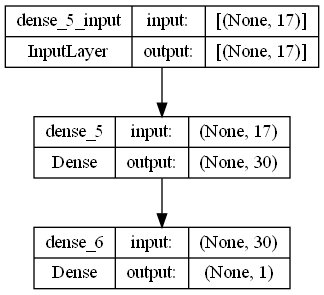

In [42]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

# 피마 인디언 당뇨병

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 피마 인디언 당뇨병 데이터셋을 불러옵니다. 불러올 때 각 컬럼에 해당하는 이름을 지정합니다
df = pd.read_csv('./data/dataset/pima-indians-diabetes.csv', 
                names = ['pregnant','plasma','pressure','thickness','insulin','BMI','pedigree','age','class'])

# 처음 5줄 보기
print(df.head(5))

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1


In [44]:
# pregnant : 임신횟수
# plasma : 포도당 부하 검사 2시간 후 공복 혈당 농도
# pressure : 혈압
# thickness : 팔 삼두근 뒤쪽의 피하지방 측정값
# insulin : 혈청 인슐린
# BMI : 체질량 지수
# pedigree : 당뇨 내력 가중치 값
# age : 나이
# class : 당뇨여부(0 또는 1)

In [45]:
# 데이터의 전반적인 정보를 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [46]:
# 각 정보별 특징을 좀 더 자세히 출력합니다
print(df.describe())

         pregnant      plasma    pressure   thickness     insulin         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [47]:
print(df[['pregnant','class']])

     pregnant  class
0           6      1
1           1      0
2           8      1
3           1      0
4           0      1
..        ...    ...
763        10      0
764         2      0
765         5      0
766         1      1
767         1      0

[768 rows x 2 columns]


In [48]:
df[['pregnant','class']]\
    .groupby(['pregnant'], as_index=False)\
        .mean().sort_values(by='pregnant', ascending=True)

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


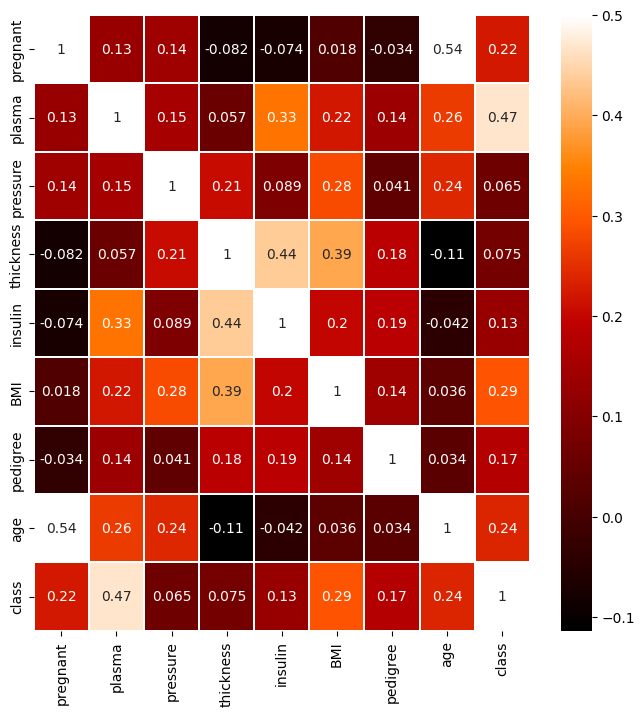

In [49]:
# 데이터 간의 상관관계를 그래프로 표현
colormap = plt.cm.gist_heat  # 그래프의 색상구성
plt.figure(figsize=(8, 8))   # 그래프의 크기

# 그래프의 속성을 결정합니다. vmax의 값을 0.5로 지정해 0.5에 가까울수록 밝은 색으로 표시되게 합니다
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

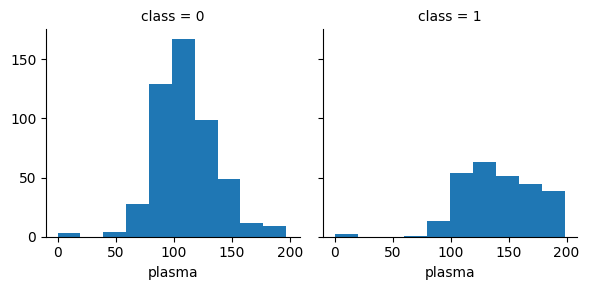

In [50]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

In [51]:
# 딥러닝을 구동하는데 필요한 케라스 함수를 불러옵니다
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리를 불러옵니다
import numpy
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다
numpy.random.seed(3)
tf.random.set_seed(3)

# 데이터를 불러 옵니다
dataset = numpy.loadtxt('./data/dataset/pima-indians-diabetes.csv', delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]

# 모델을 설정합니다
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

# 모델을 실행
model.fit(X, Y, epochs=200, batch_size=10)

# 결과를 출력
print("\n Accuracy: %.4f" 
      % (model.evaluate(X,Y)[1]))

Epoch 1/200
77/77 [==============================] - 0s 747us/step - loss: 5.4733 - accuracy: 0.5781
Epoch 2/200
77/77 [==============================] - 0s 721us/step - loss: 1.9168 - accuracy: 0.4492
Epoch 3/200
77/77 [==============================] - 0s 734us/step - loss: 1.0482 - accuracy: 0.5443
Epoch 4/200
77/77 [==============================] - 0s 721us/step - loss: 0.8575 - accuracy: 0.6003
Epoch 5/200
77/77 [==============================] - 0s 721us/step - loss: 0.7854 - accuracy: 0.6133
Epoch 6/200
77/77 [==============================] - 0s 722us/step - loss: 0.7490 - accuracy: 0.6341
Epoch 7/200
77/77 [==============================] - 0s 708us/step - loss: 0.7130 - accuracy: 0.6432
Epoch 8/200
77/77 [==============================] - 0s 734us/step - loss: 0.7116 - accuracy: 0.6341
Epoch 9/200
77/77 [==============================] - 0s 721us/step - loss: 0.6917 - accuracy: 0.6615
Epoch 10/200
77/77 [==============================] - 0s 721us/step - loss: 0.6634 - accura

# 아이리스 다중분류

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다
np.random.seed(3)
tf.random.set_seed(3)

# 데이터 입력
iris=load_iris()

In [53]:
# df = pd.read_csv('./data/dataset/iris.csv', names=['sepal_length','sepal_width','petal_length','petal_width','species'])
# df

In [54]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [55]:
# # 그래프로 확인
# sns.pairplot(df, hue='species')
# plt.show()

In [56]:
# # 데이터 분류
# dataset = df.values
# X = dataset[:, 0:4].astype(float)
# Y_obj = dataset[:,4]

In [58]:
# # 문자열을 숫자로 변환
# e = LabelEncoder()
# e.fit(Y_obj)
# Y = e.transform(Y_obj)
# Y_encoded = tf.keras.utils.to_categorical(Y)

In [57]:
X = iris.data
Y_obj = iris.target
# load_iris라 LabelEncoder은 안해도 됨
Y_encoded = tf.keras.utils.to_categorical(Y_obj)
Y_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [60]:
# 모델의 설정
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [61]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', 
                optimizer='adam',
                metrics=['accuracy'])
# 모델 실행
model.fit(X, Y_encoded, epochs=50, batch_size=1)

# 결과 출력
print('\n Accuracy: %.4f' % (model.evaluate(X, Y_encoded)[1]))

Epoch 1/50
150/150 [==============================] - 0s 649us/step - loss: 1.3857 - accuracy: 0.3333
Epoch 2/50
150/150 [==============================] - 0s 624us/step - loss: 0.8511 - accuracy: 0.6467
Epoch 3/50
150/150 [==============================] - 0s 615us/step - loss: 0.6691 - accuracy: 0.9467
Epoch 4/50
150/150 [==============================] - 0s 669us/step - loss: 0.5681 - accuracy: 0.8733
Epoch 5/50
150/150 [==============================] - 0s 669us/step - loss: 0.5006 - accuracy: 0.9000
Epoch 6/50
150/150 [==============================] - 0s 622us/step - loss: 0.4438 - accuracy: 0.9467
Epoch 7/50
150/150 [==============================] - 0s 642us/step - loss: 0.4018 - accuracy: 0.9267
Epoch 8/50
150/150 [==============================] - 0s 640us/step - loss: 0.3751 - accuracy: 0.9333
Epoch 9/50
150/150 [==============================] - 0s 642us/step - loss: 0.3467 - accuracy: 0.9600
Epoch 10/50
150/150 [==============================] - 0s 642us/step - loss: 0.323

In [63]:
# 임의 데이터 분류
dummy = np.array([[4.8, 3.3, 1.2, 0.2]])
pred = model.predict(dummy)
pred
print(pred, pred.round(), sep='\n')

1/1 [==============================] - 0s 14ms/step
[[9.9977165e-01 2.2829391e-04 8.1477308e-10]]
[[1. 0. 0.]]


# 초음파 광물 예측(과적합 피하기)

In [67]:
import pandas as pd

df = pd.read_csv('./data/dataset/sonar.csv', header=None)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [68]:
print(df.head())

       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0044   R  
2  0.0095  0.0078   

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import numpy as np
import tensorflow as tf

# seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

dataset = df.values
X = dataset[:,0:60].astype(float)
Y_obj = dataset[:,60]

In [75]:
np.unique(Y_obj)

array(['M', 'R'], dtype=object)

In [79]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [73]:
# 문자열 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# 모델 선정
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# 모델 실행
model.fit(X, Y, epochs=200, batch_size=5)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Epoch 1/200
42/42 [==============================] - 0s 806us/step - loss: 0.6822 - accuracy: 0.5721
Epoch 2/200
42/42 [==============================] - 0s 737us/step - loss: 0.6548 - accuracy: 0.6971
Epoch 3/200
42/42 [==============================] - 0s 759us/step - loss: 0.6407 - accuracy: 0.6394
Epoch 4/200
42/42 [==============================] - 0s 850us/step - loss: 0.6130 - accuracy: 0.6875
Epoch 5/200
42/42 [==============================] - 0s 769us/step - loss: 0.5854 - accuracy: 0.7212
Epoch 6/200
42/42 [==============================] - 0s 802us/step - loss: 0.5684 - accuracy: 0.6971
Epoch 7/200
42/42 [==============================] - 0s 800us/step - loss: 0.5419 - accuracy: 0.7548
Epoch 8/200
42/42 [==============================] - 0s 808us/step - loss: 0.5213 - accuracy: 0.7452
Epoch 9/200
42/42 [==============================] - 0s 824us/step - loss: 0.5114 - accuracy: 0.7692
Epoch 10/200
42/42 [==============================] - 0s 830us/step - loss: 0.4925 - accura

과적합 상황이다

In [85]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

df = pd.read_csv('./data/dataset/sonar.csv', header=None)

dataset = df.values
X = dataset[:,0:60]
X = np.asarray(X).astype(np.float32) # dtype이 object인데, float로 바꿔준다
Y_obj = dataset[:,60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# 학습셋과 테스트셋의 구분
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error', 
              optimizer='adam', 
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=130, batch_size=5)

# 테스트셋에 모델 적용
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Epoch 1/130
29/29 [==============================] - 0s 805us/step - loss: 0.2459 - accuracy: 0.5448
Epoch 2/130
29/29 [==============================] - 0s 712us/step - loss: 0.2396 - accuracy: 0.5448
Epoch 3/130
29/29 [==============================] - 0s 747us/step - loss: 0.2366 - accuracy: 0.5517
Epoch 4/130
29/29 [==============================] - 0s 926us/step - loss: 0.2320 - accuracy: 0.6621
Epoch 5/130
29/29 [==============================] - 0s 747us/step - loss: 0.2271 - accuracy: 0.6759
Epoch 6/130
29/29 [==============================] - 0s 783us/step - loss: 0.2226 - accuracy: 0.6828
Epoch 7/130
29/29 [==============================] - 0s 748us/step - loss: 0.2186 - accuracy: 0.6621
Epoch 8/130
29/29 [==============================] - 0s 780us/step - loss: 0.2136 - accuracy: 0.6759
Epoch 9/130
29/29 [==============================] - 0s 783us/step - loss: 0.2087 - accuracy: 0.6897
Epoch 10/130
29/29 [==============================] - 0s 747us/step - loss: 0.2057 - accura

In [86]:
model.save('my_model.h5') # 모델을 컴퓨터에 저장

del model  # 테스트를 위해 메모리 내의 모델을 삭제
model = load_model('my_model.h5')  #모델을 새로 불러옴

# K-fold

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
import numpy
import pandas as pd
import tensorflow as tf
# seed 값 설정
seed = 0
numpy.random.seed(0)
tf.random.set_seed(3)
df = pd.read_csv('./data/dataset/sonar.csv', header=None)
dataset = df.values
X = dataset[:,0:60].astype(float)
Y_obj = dataset[:,60]
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

In [89]:
# 10개의 파일로 쪼갬
n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

# 빈 accuracy 배열
accuracy = []

# 모델의 설정, 컴파일, 실행
for train, test in skf.split(X, Y):
    model = Sequential()
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error', 
                    optimizer='adam', 
                    metrics=['accuracy'])
    model.fit(X[train], Y[train], epochs=100, batch_size=5)
    k_accuracy = "%.4f" % (model.evaluate(X[test],Y[test])[1])
    accuracy.append(k_accuracy)

# 결과 출력
print('\n %.f fold accuracy:' % n_fold, accuracy)

Epoch 1/100
38/38 [==============================] - 0s 871us/step - loss: 0.2544 - accuracy: 0.4813
Epoch 2/100
38/38 [==============================] - 0s 862us/step - loss: 0.2398 - accuracy: 0.6203
Epoch 3/100
38/38 [==============================] - 0s 808us/step - loss: 0.2332 - accuracy: 0.6471
Epoch 4/100
38/38 [==============================] - 0s 754us/step - loss: 0.2239 - accuracy: 0.6684
Epoch 5/100
38/38 [==============================] - 0s 808us/step - loss: 0.2123 - accuracy: 0.7219
Epoch 6/100
38/38 [==============================] - 0s 835us/step - loss: 0.1969 - accuracy: 0.7380
Epoch 7/100
38/38 [==============================] - 0s 808us/step - loss: 0.1862 - accuracy: 0.7433
Epoch 8/100
38/38 [==============================] - 0s 862us/step - loss: 0.1732 - accuracy: 0.7861
Epoch 9/100
38/38 [==============================] - 0s 781us/step - loss: 0.1635 - accuracy: 0.7647
Epoch 10/100
38/38 [==============================] - 0s 808us/step - loss: 0.1534 - accura